In [12]:
import os
import sys
sys.path.insert(0, os.getcwd())
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [13]:
import mindspore as ms
ms.set_context(device_target="Ascend", device_id=0, mode=0)

In [14]:
from mindformers.pipeline import pipeline
pipeline_task = pipeline("segment_anything", model='sam_vit_h')

[WARNING] ME(1847513:281462104016960,MainProcess):2023-08-23-16:33:59.696.777 [mindspore/train/serialization.py:167] The type of image_encoder.blocks.0.attn.rel_pos_h:Float32 in 'parameter_dict' is different from the type of it in 'net':Float16, then the type convert from Float32 to Float16 in the network.
[WARNING] ME(1847513:281462104016960,MainProcess):2023-08-23-16:33:59.699.121 [mindspore/train/serialization.py:167] The type of image_encoder.blocks.0.attn.rel_pos_w:Float32 in 'parameter_dict' is different from the type of it in 'net':Float16, then the type convert from Float32 to Float16 in the network.
[WARNING] ME(1847513:281462104016960,MainProcess):2023-08-23-16:33:59.739.676 [mindspore/train/serialization.py:167] The type of image_encoder.blocks.1.attn.rel_pos_h:Float32 in 'parameter_dict' is different from the type of it in 'net':Float16, then the type convert from Float32 to Float16 in the network.
[WARNING] ME(1847513:281462104016960,MainProcess):2023-08-23-16:33:59.741.61

2023-08-23 16:34:01,359 - mindformers - INFO - weights in /home/zhangsenzhen/sam/sam_vit_h_4b8939.ckpt are loaded


In [15]:
def show_anns(anns):
    if not anns:
        return
    sorted_anns = sorted(anns, key=(lambda x: x['area']), reverse=True)
    ax = plt.gca()
    ax.set_autoscale_on(False)

    for ann in sorted_anns:
        m = ann['segmentation']
        img = np.ones((m.shape[0], m.shape[1], 3))
        color_mask = np.random.random((1, 3)).tolist()[0]
        for i in range(3):
            img[:, :, i] = color_mask[i]
        ax.imshow(np.dstack((img, m*0.35)))

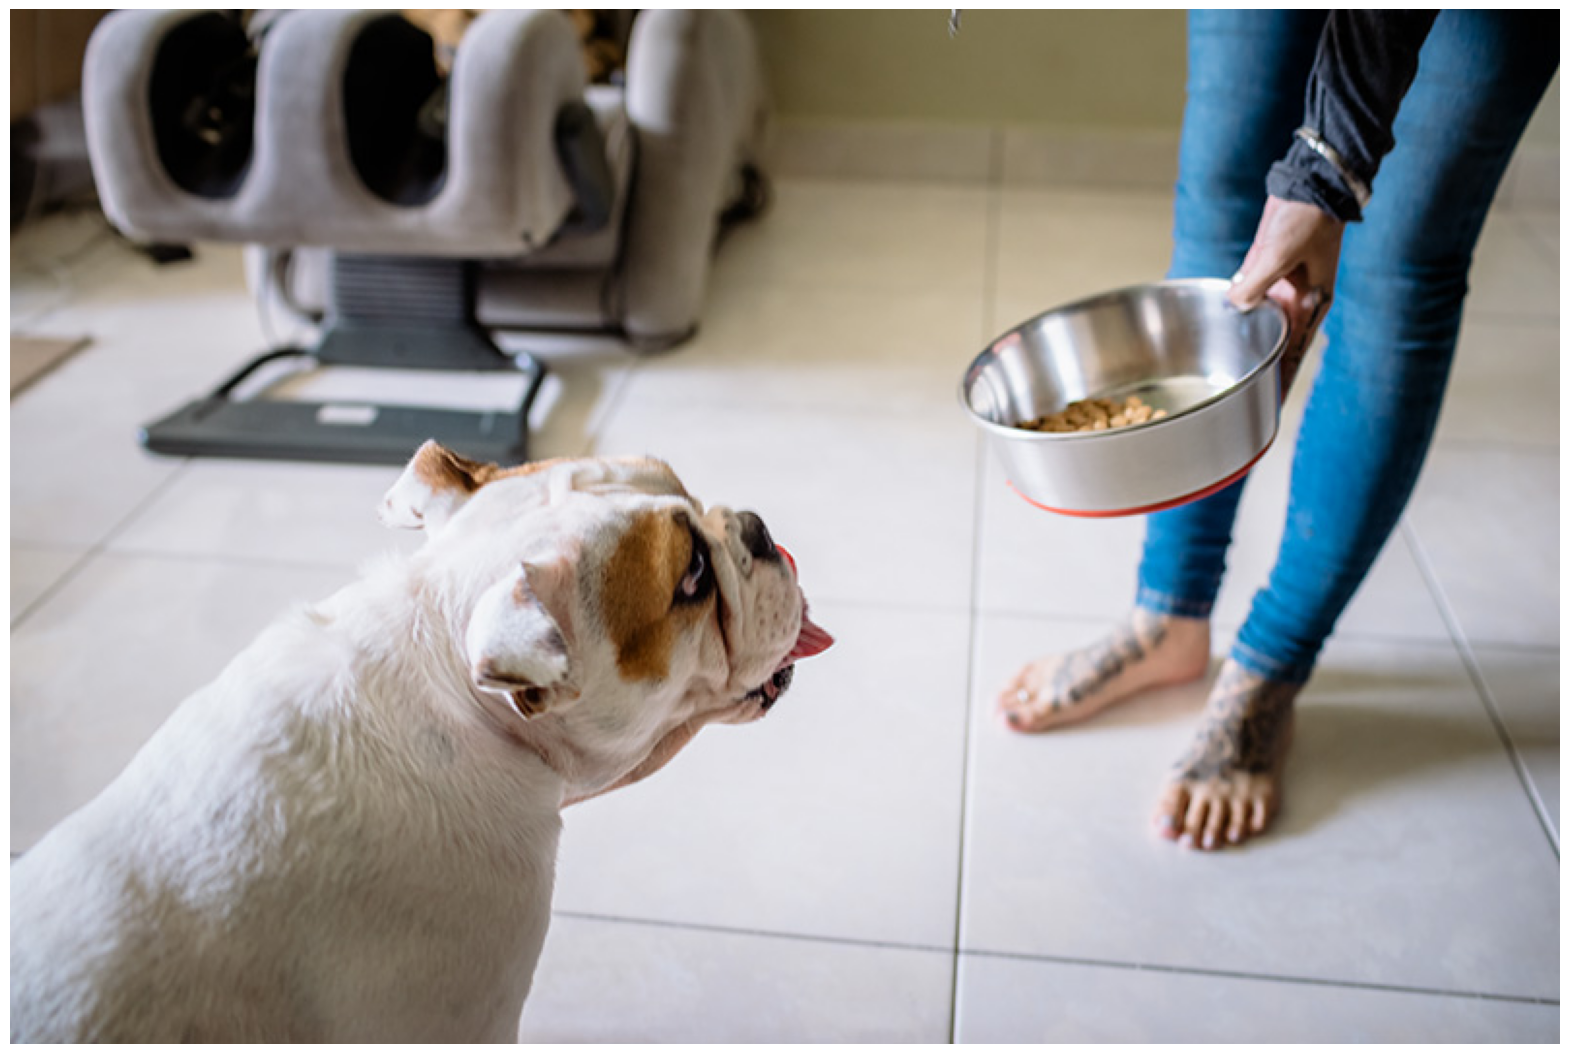

In [16]:
image = cv2.imread("images/dog.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(20, 20))
plt.imshow(image)
plt.axis('off')
plt.show()

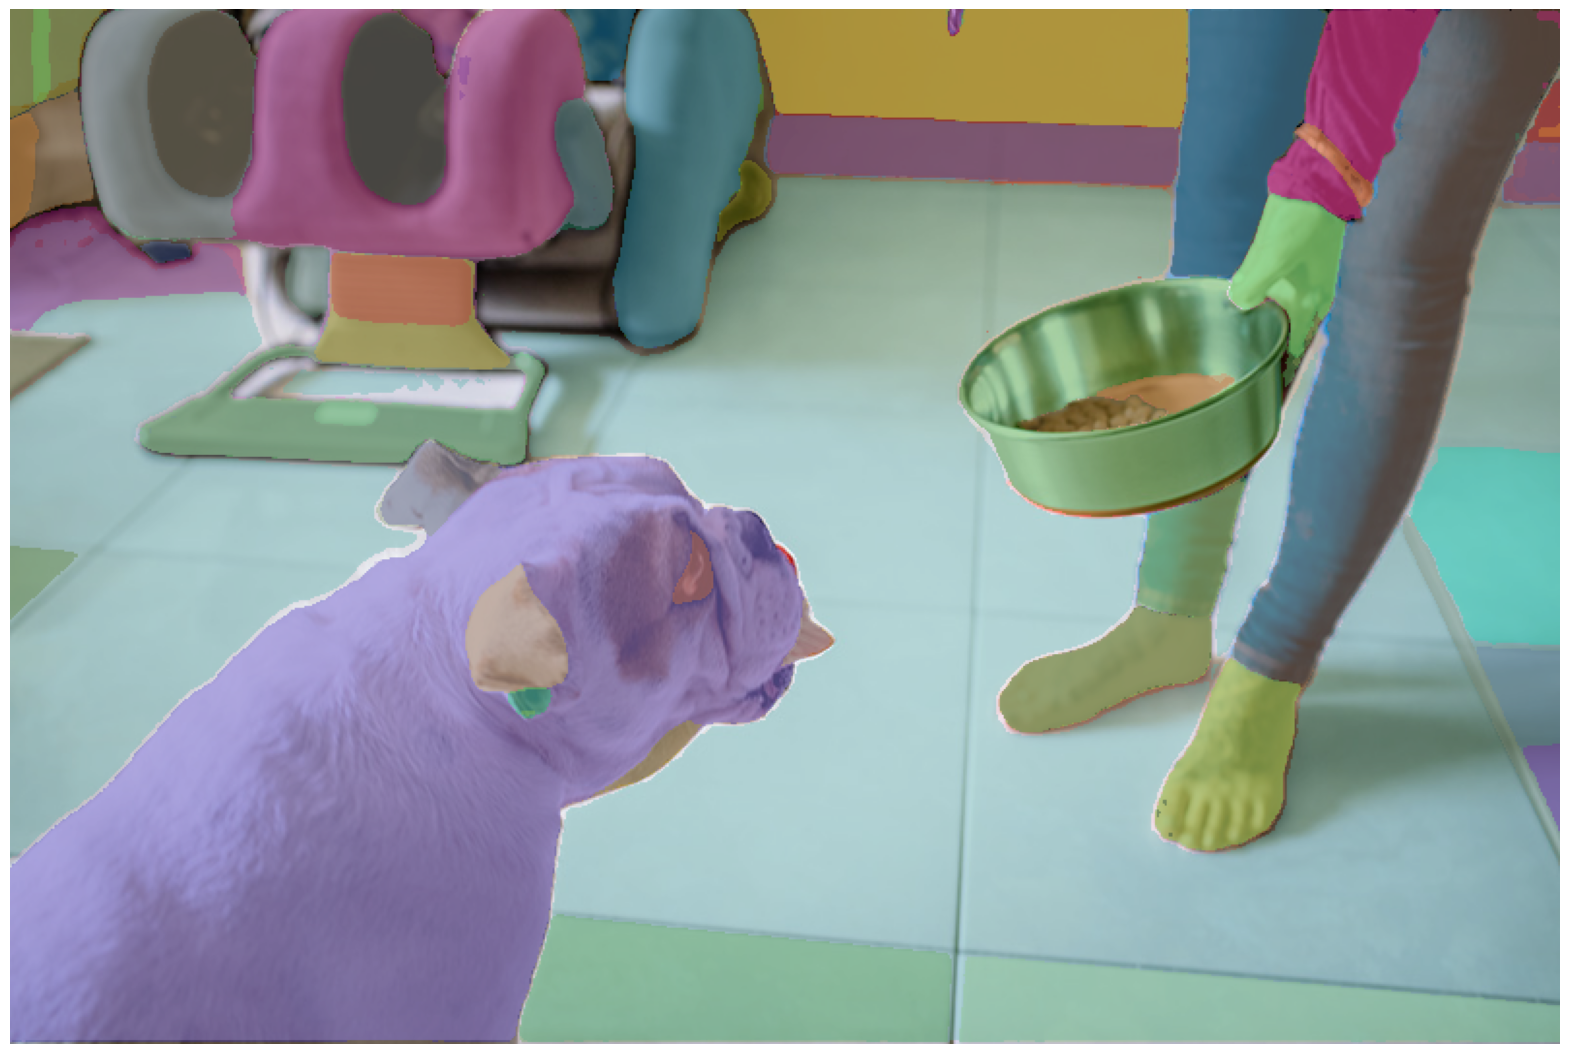

In [19]:
# 9.全图分割: 默认参数， image传入cv2图像
masks = pipeline_task({"image": image}, seg_image=True)

plt.figure(figsize=(20, 20))
plt.imshow(image)
show_anns(masks)
plt.axis('off')
plt.show()

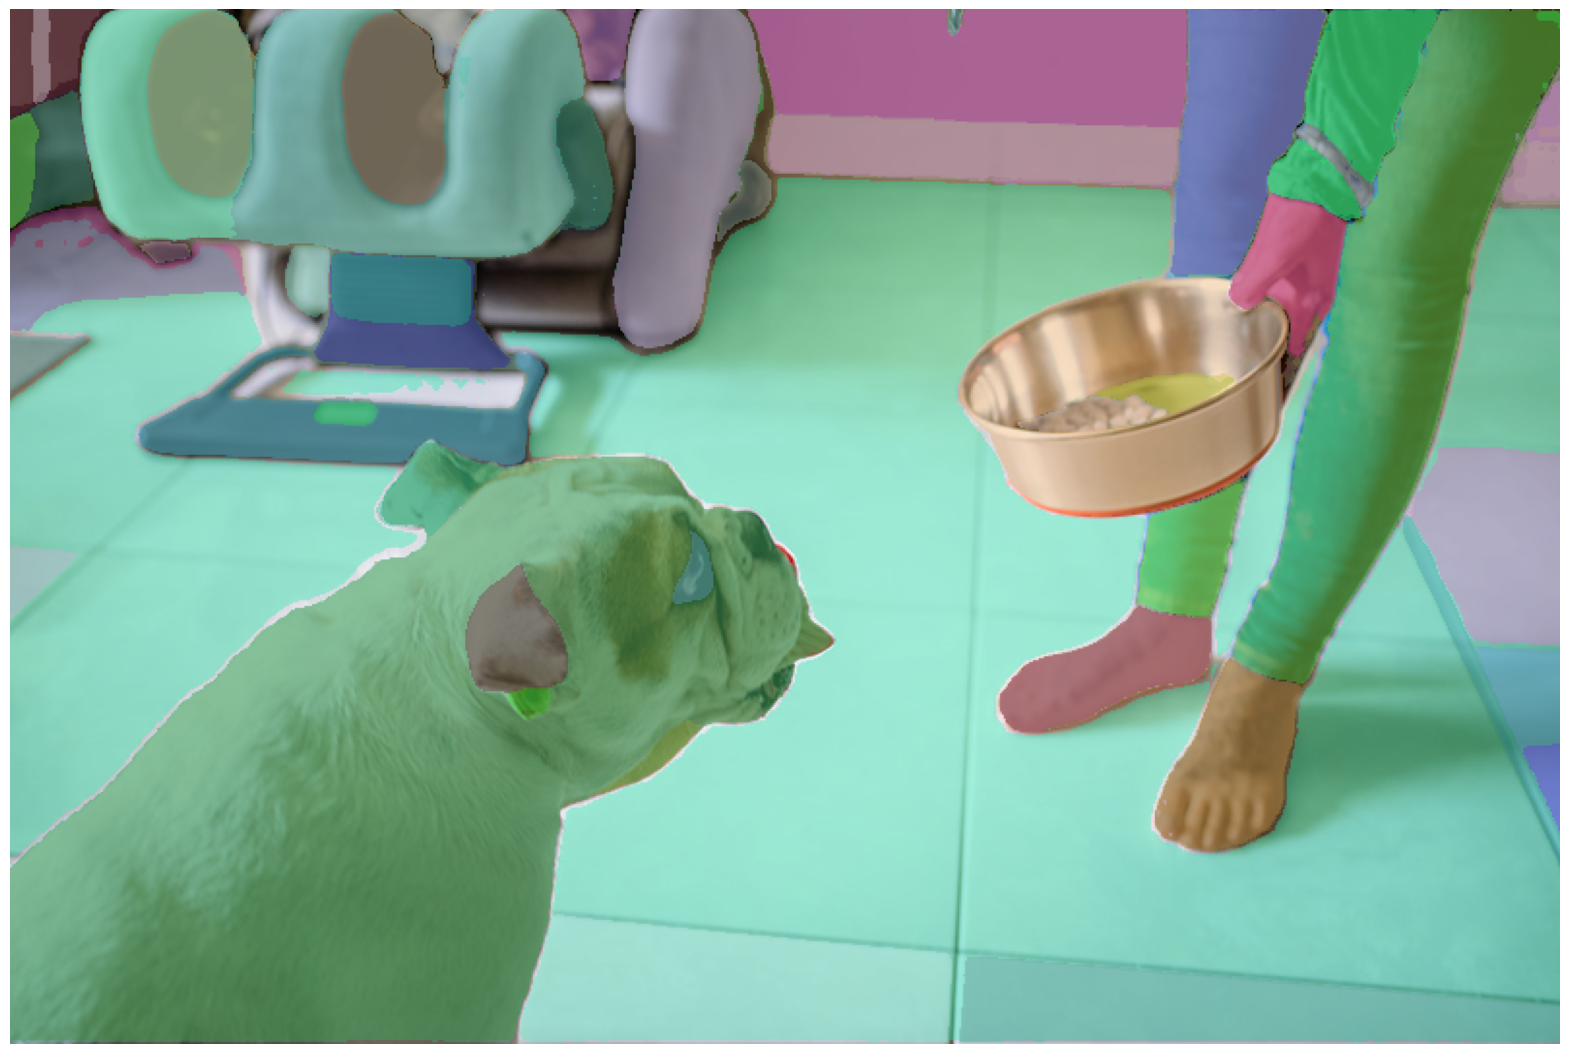

In [21]:
# 9.全图分割: 默认参数，image传入图像路径
masks = pipeline_task({"image": "images/dog.jpg"}, seg_image=True)

plt.figure(figsize=(20, 20))
plt.imshow(image)
show_anns(masks)
plt.axis('off')
plt.show()

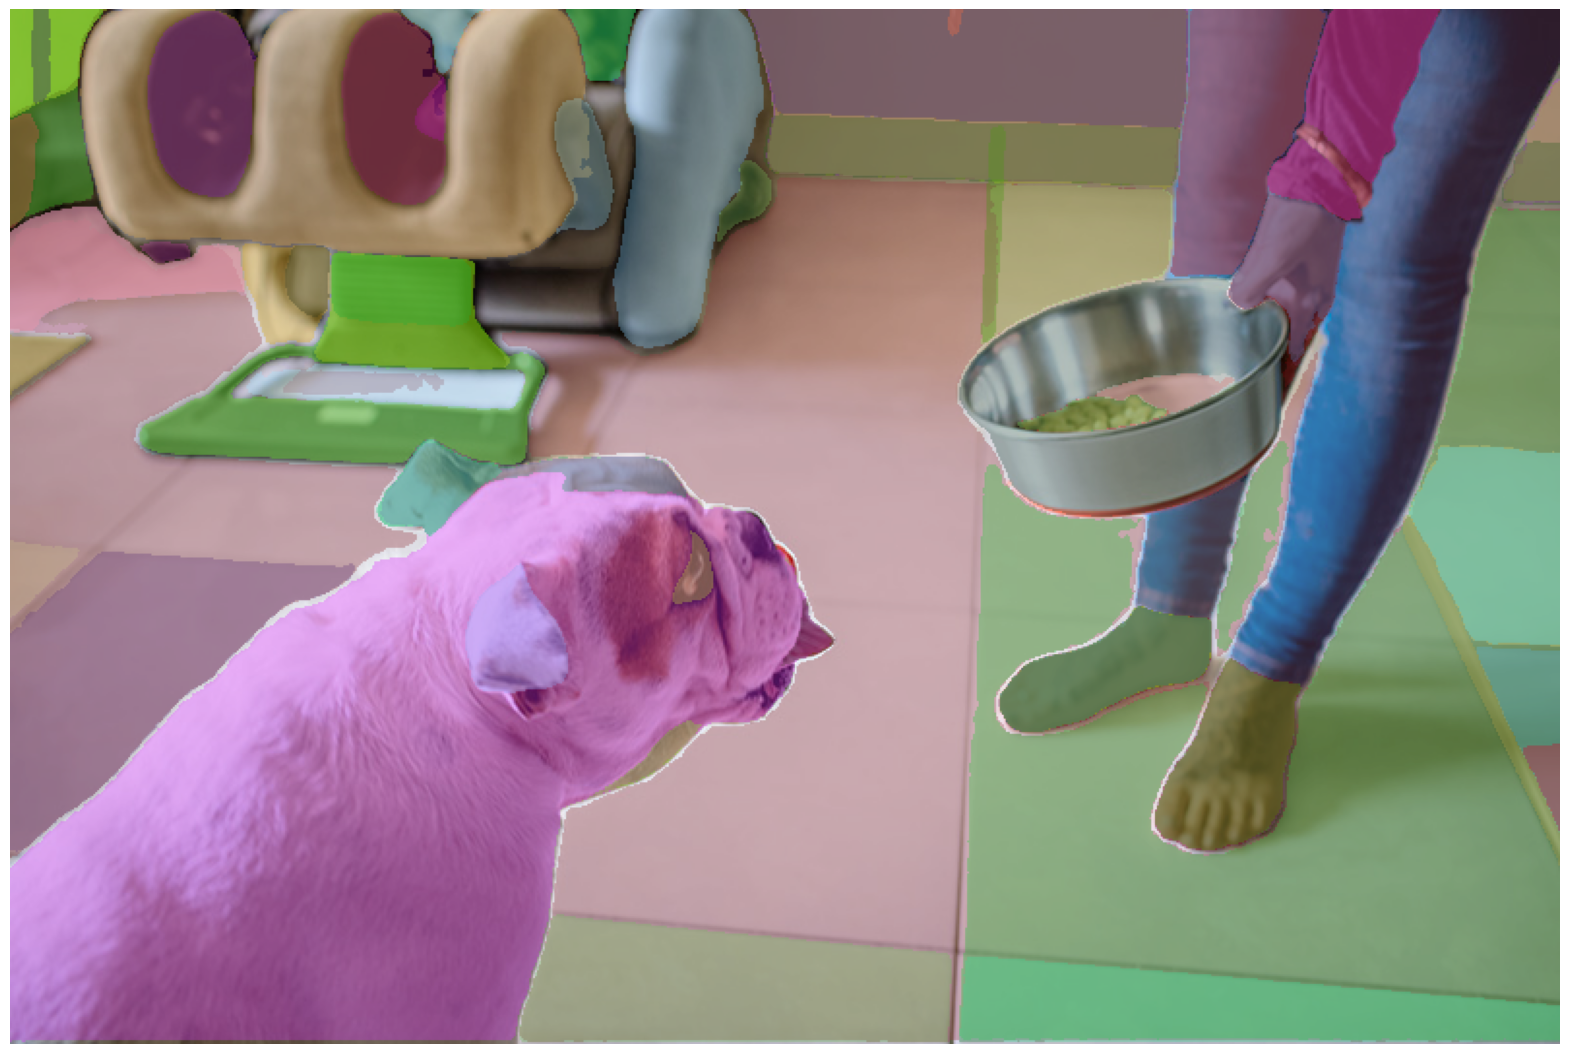

In [22]:
# 10.全图分割：调整参数
masks = pipeline_task({"image": image}, seg_image=True,
                      points_per_side=32,
                      pred_iou_thresh=0.86,
                      stability_score_thresh=0.92,
                      crop_n_layers=1,
                      crop_n_points_downscale_factor=2,
                      min_mask_region_area=100)

plt.figure(figsize=(20, 20))
plt.imshow(image)
show_anns(masks)
plt.axis('off')
plt.show()